In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
max_features = 10000
max_len = 500
batch_size = 32

In [3]:
(input_train,y_train),(input_test,y_test) = imdb.load_data(num_words=max_features)

In [4]:
print("train sequence",len(input_train))
print("test sequence",len(input_test))

train sequence 25000
test sequence 25000


In [5]:
# データのサイズを揃える
input_train = sequence.pad_sequences(input_train,maxlen=max_len)
input_test = sequence.pad_sequences(input_test,maxlen=max_len)

In [6]:
# 正しく揃えられたか確認
print('input_train    shape:',input_train.shape)
print('iput_test      shape:',input_test.shape)

input_train    shape: (25000, 500)
iput_test      shape: (25000, 500)


In [9]:
# モデルを構築
from keras.models import Sequential
from keras.layers import Embedding , SimpleRNN,Dense,Dropout,Bidirectional,RepeatVector,TimeDistributed,Activation,LSTM

In [14]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 10s 503us/step - loss: 0.6377 - acc: 0.6187 - val_loss: 0.5058 - val_acc: 0.7782
Epoch 2/10
20000/20000 [==============================] - 10s 500us/step - loss: 0.4182 - acc: 0.8202 - val_loss: 0.3714 - val_acc: 0.8480
Epoch 3/10
20000/20000 [==============================] - 10s 495us/step - loss: 0.3098 - acc: 0.8770 - val_loss: 0.3356 - val_acc: 0.8604
Epoch 4/10
20000/20000 [==============================] - 10s 496us/step - loss: 0.2531 - acc: 0.9018 - val_loss: 0.3674 - val_acc: 0.8330
Epoch 5/10
20000/20000 [==============================] - 10s 497us/step - loss: 0.2066 - acc: 0.9224 - val_loss: 0.3869 - val_acc: 0.8616
Epoch 6/10
20000/20000 [==============================] - 10s 506us/step - loss: 0.1421 - acc: 0.9502 - val_loss: 0.4036 - val_acc: 0.8626
Epoch 7/10
20000/20000 [==============================] - 10s 497us/step - loss: 0.1021 - acc: 0.9646 - val_loss: 0.4

In [15]:
import matplotlib.pyplot as plt

In [18]:
# model.fitの返し値には各層の値の履歴が入っている
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

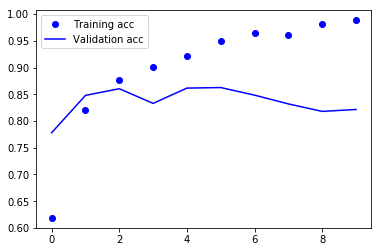

In [24]:
# 横軸をサイズから取得
x = range(len(acc))

#正解率の推移をプロット
plt.plot(x,acc,'bo',label="Training acc")
plt.plot(x,val_acc,'b',label="Validation acc")
plt.legend()

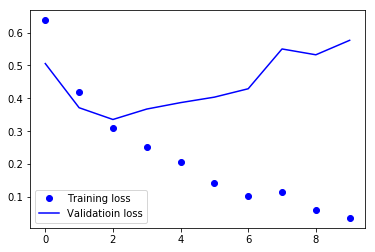

In [25]:
# 損失値をプロット
plt.plot(x,loss,'bo',label="Training loss")
plt.plot(x,val_loss,'b',label="Validatioin loss")
plt.legend()
plt.show()

In [8]:
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.4975 - acc: 0.7681 - val_loss: 0.4132 - val_acc: 0.8214
Epoch 2/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.2972 - acc: 0.8817 - val_loss: 0.3135 - val_acc: 0.8658
Epoch 3/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.2371 - acc: 0.9084 - val_loss: 0.3452 - val_acc: 0.8622
Epoch 4/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.2020 - acc: 0.9247 - val_loss: 0.3462 - val_acc: 0.8566
Epoch 5/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.1749 - acc: 0.9348 - val_loss: 0.2944 - val_acc: 0.8842
Epoch 6/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.1620 - acc: 0.9412 - val_loss: 0.3772 - val_acc: 0.8598
Epoch 7/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.1406 - acc: 0.9496 - val_loss: 0.3209 - val_acc: